<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip3 install xgboost
!pip3 install pandas_ta==0.3.14b0
!pip3 install optuna
!pip3 install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip3 install --upgrade numpy
!pip3 install --upgrade pandas_ta
!pip3 install statsmodels
!pip3 install arch
!pip3 install pytorch-forecasting
!pip3 install prophet
!pip3 install optuna
!pip3 install xgboost
!pip3 install torch
!pip3 install yfinance


  Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [xgboost]m1/3 [scipy]
  Using cached pandas_ta-0.3.14b0-py3-none-any.whl
  Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas_t

In [2]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta


/Users/chielg/Documents/GitHub/MLOps/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt

In [4]:

# api_key = '832OZZOS1E3Z1RJR'
# symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# ts = TimeSeries(key=api_key, output_format='pandas')
# all_data = {}
# for symbol in symbols:
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     # Filter data from 2018 onwards
#     data.index = pd.to_datetime(data.index)
#     data = data[data.index >= '2012-01-01']
#     all_data[symbol] = data
#     print(f"Data for {symbol}:")
#     print(data.head())  # Print the first few rows of the dataset
#     # Plot the data
#     data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
#     plt.xlabel('Date')
#     plt.ylabel('Closing Price')
#     plt.grid(True)
#     plt.show()

/Users/chielg/Documents/GitHub/MLOps/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Data for LIT:
Price           Close       High        Low       Open  Volume
Ticker            LIT        LIT        LIT        LIT     LIT
Date                                                          
2023-06-01  60.102169  60.268849  59.131516  59.386434  337600
2023-06-02  62.102306  62.474882  61.102237  61.533638  547700
2023-06-05  61.719929  62.063088  61.455204  61.886605  243100
2023-06-06  62.641556  62.778820  61.278718  61.366959  322400
2023-06-07  61.896408  62.612143  61.690509  62.484682  304600


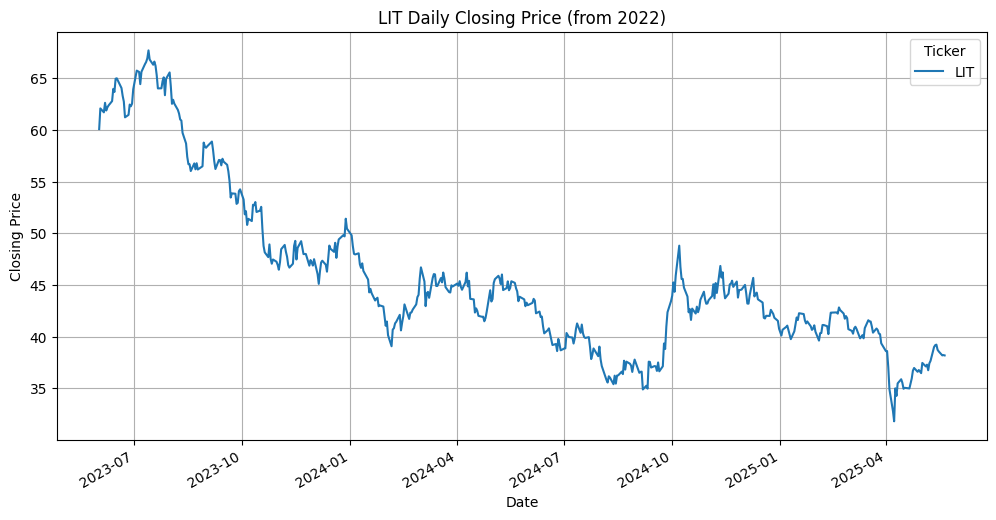

[*********************100%***********************]  1 of 1 completed


Data for REMX:
Price           Close       High        Low       Open  Volume
Ticker           REMX       REMX       REMX       REMX    REMX
Date                                                          
2023-06-01  78.765999  79.312170  76.864141  77.068955   96100
2023-06-02  82.101555  82.316124  81.340815  81.379828   63700
2023-06-05  81.448105  82.267361  80.979953  81.457853   42900
2023-06-06  82.813538  82.813538  80.882421  80.882421   74900
2023-06-07  82.062546  82.979339  81.750447  82.716001  118000


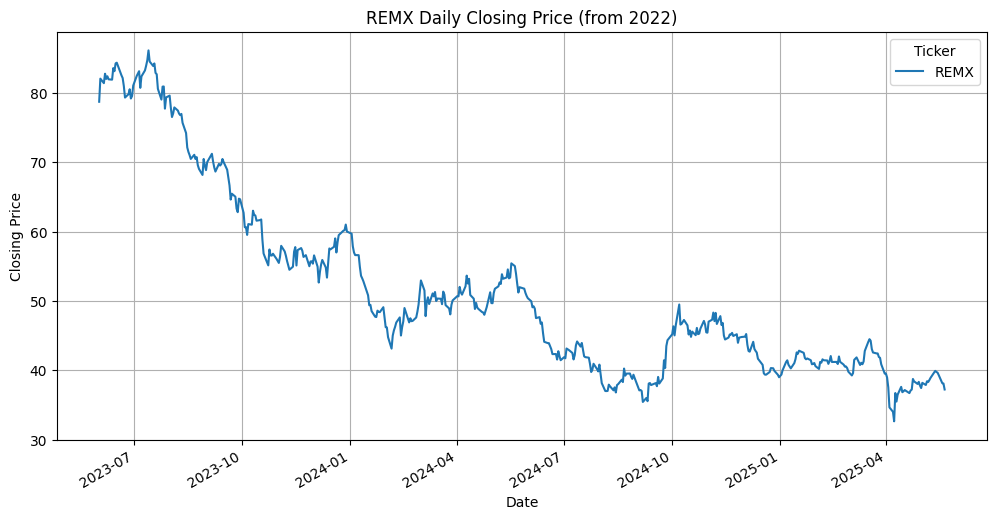

[*********************100%***********************]  1 of 1 completed

Data for URA:
Price           Close       High        Low       Open   Volume
Ticker            URA        URA        URA        URA      URA
Date                                                           
2023-06-01  19.354025  19.665891  18.253321  18.381738  4169300
2023-06-02  19.546648  19.803479  19.454922  19.675065  1552300
2023-06-05  19.830997  20.041965  19.583339  19.583339  1379700
2023-06-06  19.830997  19.849341  19.363199  19.711754  1839100
2023-06-07  19.601685  20.005274  19.583339  19.812652  1381500


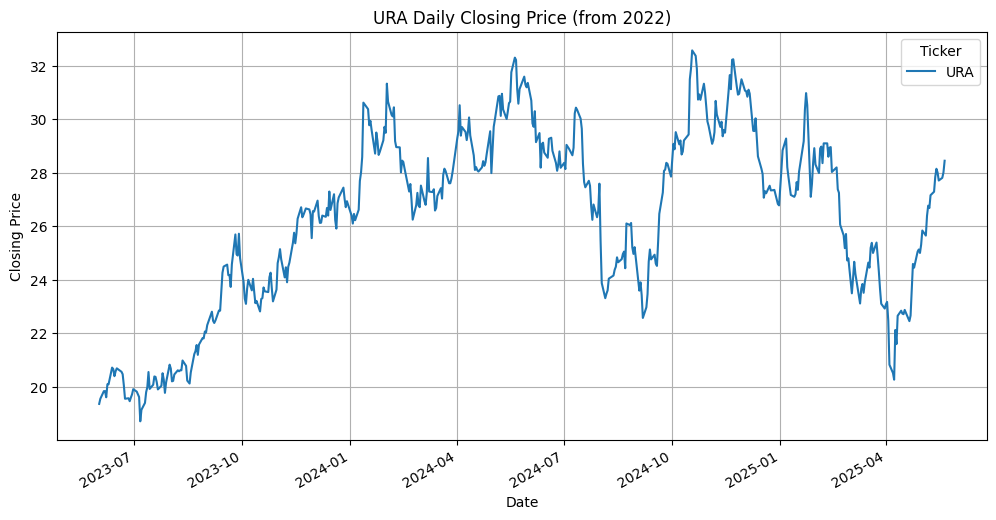

[*********************100%***********************]  1 of 1 completed

Data for GDX:
Price           Close       High        Low       Open    Volume
Ticker            GDX        GDX        GDX        GDX       GDX
Date                                                            
2023-06-01  31.127438  31.399720  30.174460  30.223081  32224600
2023-06-02  30.543982  31.360822  30.349495  31.176062  26592200
2023-06-05  30.689848  30.894059  30.359222  30.398120  12300700
2023-06-06  30.757917  30.825989  30.378671  30.777366  11372900
2023-06-07  30.193909  31.351101  30.077218  30.825989  23061300


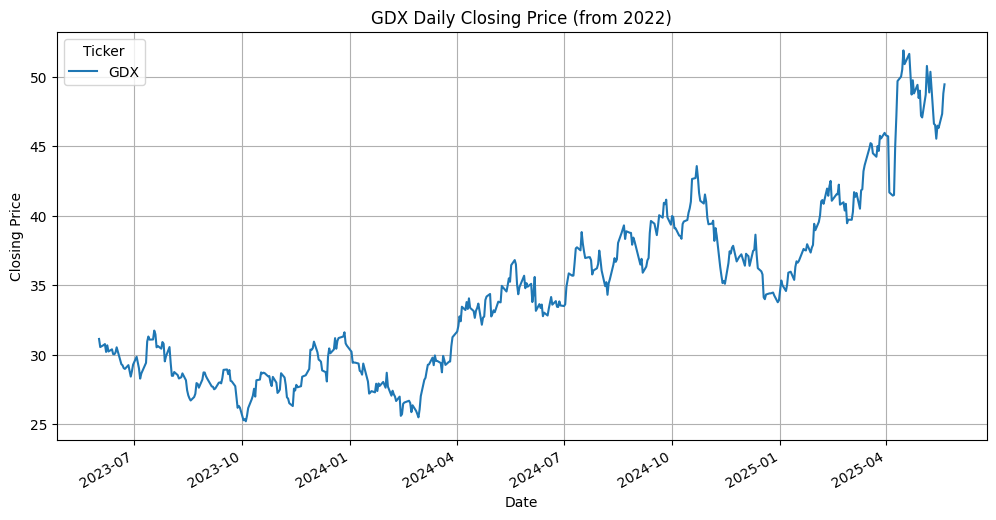

[*********************100%***********************]  1 of 1 completed

Data for GDXJ:
Price           Close       High        Low       Open   Volume
Ticker           GDXJ       GDXJ       GDXJ       GDXJ     GDXJ
Date                                                           
2023-06-01  37.259502  37.627260  36.136879  36.185267  8033300
2023-06-02  36.359467  37.530479  36.040101  37.065945  5919800
2023-06-05  36.649799  36.872388  36.165910  36.320754  3216100
2023-06-06  36.949810  36.978842  36.214296  36.659477  3463200
2023-06-07  35.991707  37.695000  35.827186  36.785285  5647400


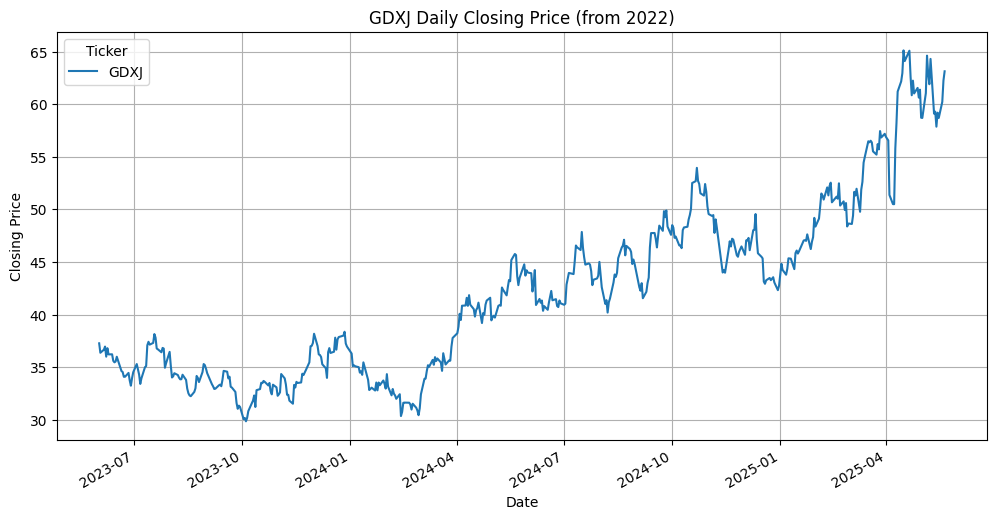

[*********************100%***********************]  1 of 1 completed

Data for XLE:
Price           Close       High        Low       Open    Volume
Ticker            XLE        XLE        XLE        XLE       XLE
Date                                                            
2023-06-01  72.582077  73.396452  71.374559  71.861307  25811800
2023-06-02  74.791183  75.146884  73.433892  73.939366  27635400
2023-06-05  74.295067  75.886366  74.164019  75.886366  18913100
2023-06-06  74.894150  74.959674  73.237320  73.312206  17375400
2023-06-07  76.878586  76.972198  75.212401  75.259206  30327100


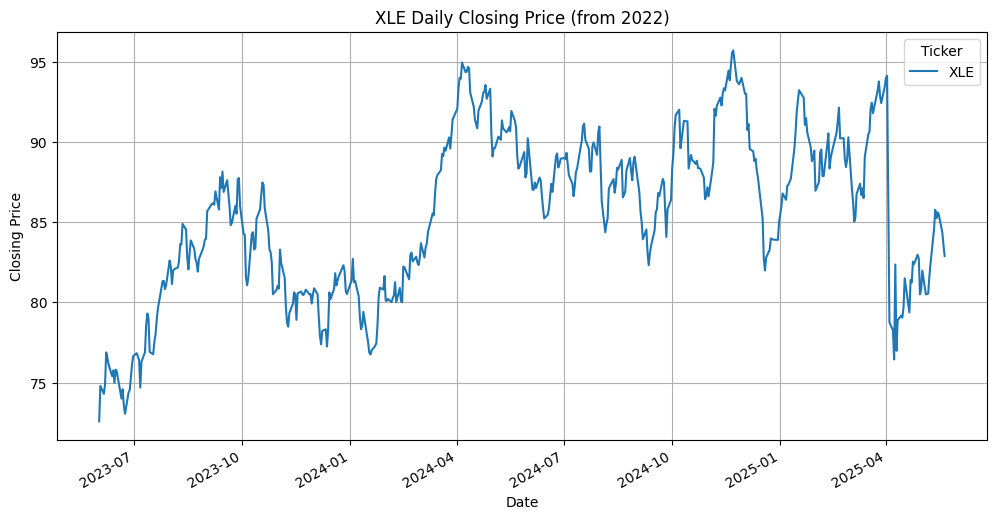

[*********************100%***********************]  1 of 1 completed

Data for ICLN:
Price           Close       High        Low       Open   Volume
Ticker           ICLN       ICLN       ICLN       ICLN     ICLN
Date                                                           
2023-06-01  18.102161  18.170032  17.724024  17.869461  3202000
2023-06-02  18.199120  18.325165  18.043986  18.257294  3634300
2023-06-05  18.131250  18.237904  18.043988  18.111858  3783000
2023-06-06  18.140944  18.315469  17.956724  18.160336  2860600
2023-06-07  18.087261  18.292243  18.038455  18.282481  3937400


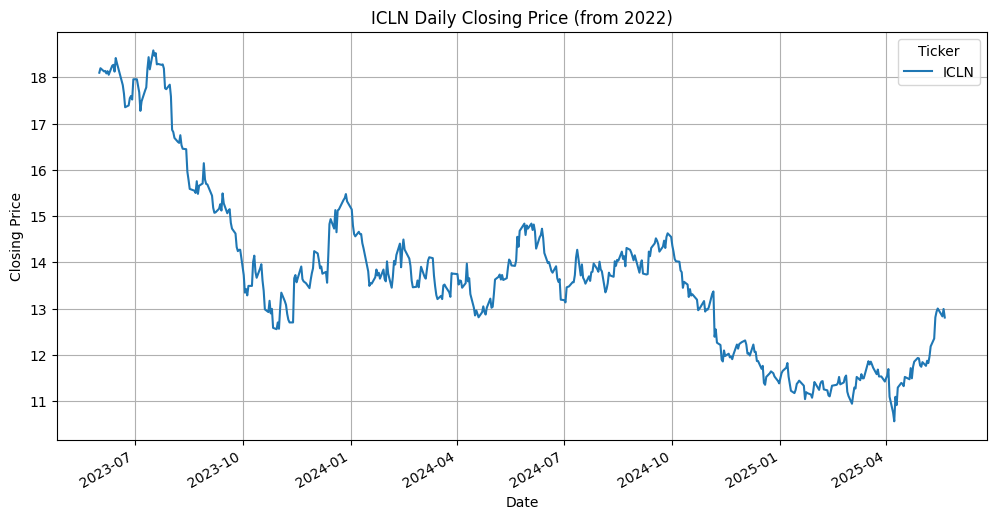

[*********************100%***********************]  1 of 1 completed

Data for SPY:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2023-06-01  410.573212  411.643889  405.677325  406.942652  88865000
2023-06-02  416.510498  417.308612  412.646348  413.181672  91366700
2023-06-05  415.712433  418.165233  415.001886  416.860964  65460200
2023-06-06  416.617645  417.152969  414.632028  415.293921  64022200
2023-06-07  415.177063  418.165216  414.748792  417.016685  85373300


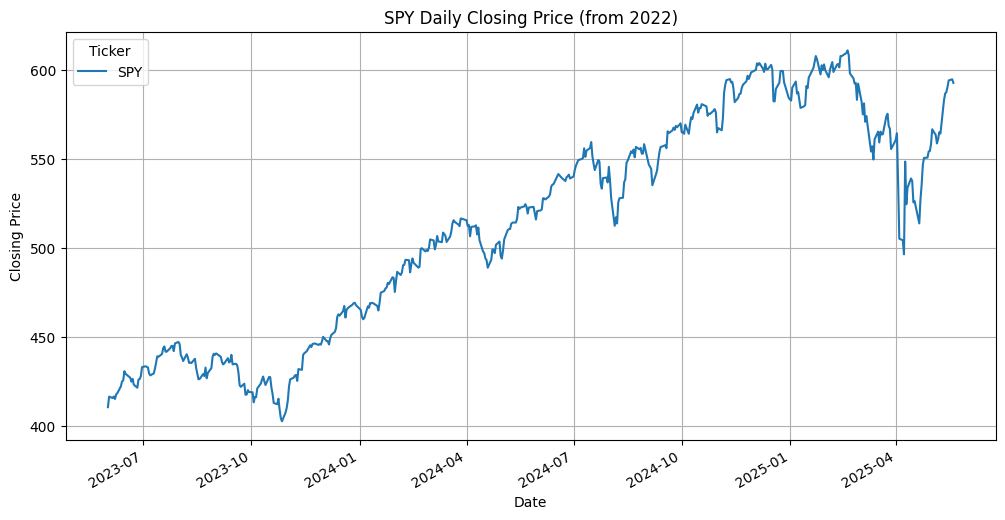

[*********************100%***********************]  1 of 1 completed

Data for GLD:
Price            Close        High         Low        Open   Volume
Ticker             GLD         GLD         GLD         GLD      GLD
Date                                                               
2023-06-01  183.759995  184.210007  182.720001  182.809998  7300500
2023-06-02  181.050003  183.559998  180.960007  183.529999  8724800
2023-06-05  182.139999  182.440002  180.600006  180.789993  5748800
2023-06-06  182.339996  182.649994  181.520004  182.360001  4967200
2023-06-07  180.149994  183.000000  180.149994  181.940002  9066500


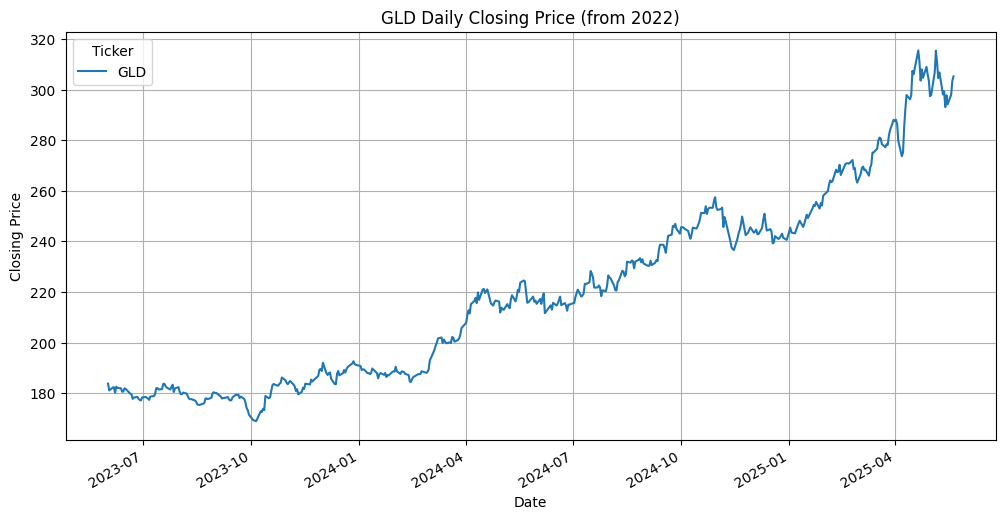

[*********************100%***********************]  1 of 1 completed

Data for CPER:
Price           Close       High        Low       Open Volume
Ticker           CPER       CPER       CPER       CPER   CPER
Date                                                         
2023-06-01  22.840000  22.959999  22.719999  22.750000  38800
2023-06-02  22.980000  23.139999  22.870001  23.139999  70600
2023-06-05  23.150000  23.340000  22.920000  23.000000  47500
2023-06-06  23.170000  23.250000  22.980000  23.160000  30200
2023-06-07  23.129999  23.410000  23.059999  23.270000  32100


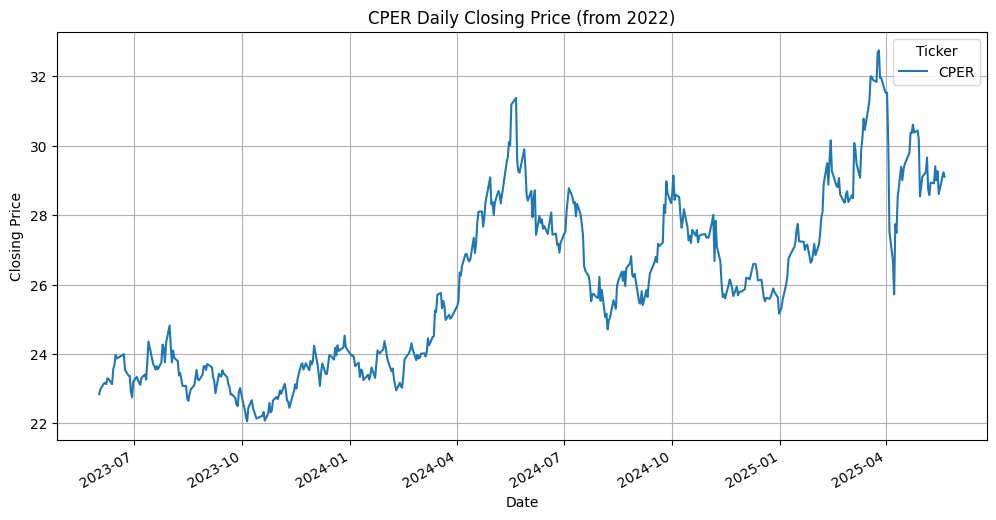

[*********************100%***********************]  1 of 1 completed

Data for USO:
Price           Close       High        Low       Open   Volume
Ticker            USO        USO        USO        USO      USO
Date                                                           
2023-06-01  62.549999  63.369999  60.630001  60.660000  3631400
2023-06-02  64.150002  64.360001  63.459999  64.099998  6934800
2023-06-05  64.029999  65.410004  64.019997  65.370003  3038400
2023-06-06  63.790001  64.430000  63.009998  63.080002  2569500
2023-06-07  64.709999  65.209999  64.209999  64.489998  3520500


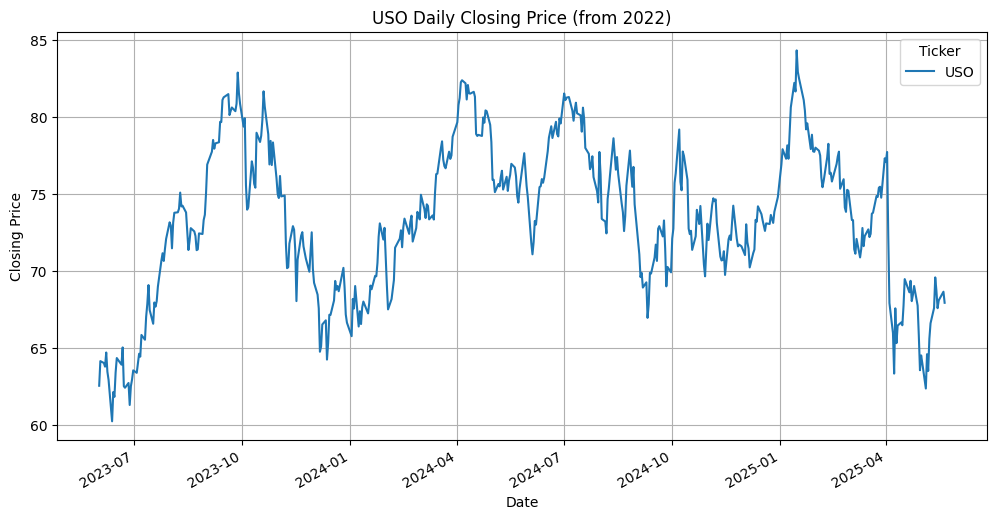

[*********************100%***********************]  1 of 1 completed

Data for UNG:
Price           Close       High        Low       Open   Volume
Ticker            UNG        UNG        UNG        UNG      UNG
Date                                                           
2023-06-01  23.760000  24.120001  23.480000  23.959999  8095700
2023-06-02  23.920000  24.520000  23.760000  24.080000  5181125
2023-06-05  24.719999  25.440001  24.400000  25.200001  5401125
2023-06-06  24.840000  25.160000  24.440001  24.600000  3288800
2023-06-07  25.559999  25.760000  24.920000  25.440001  4036175


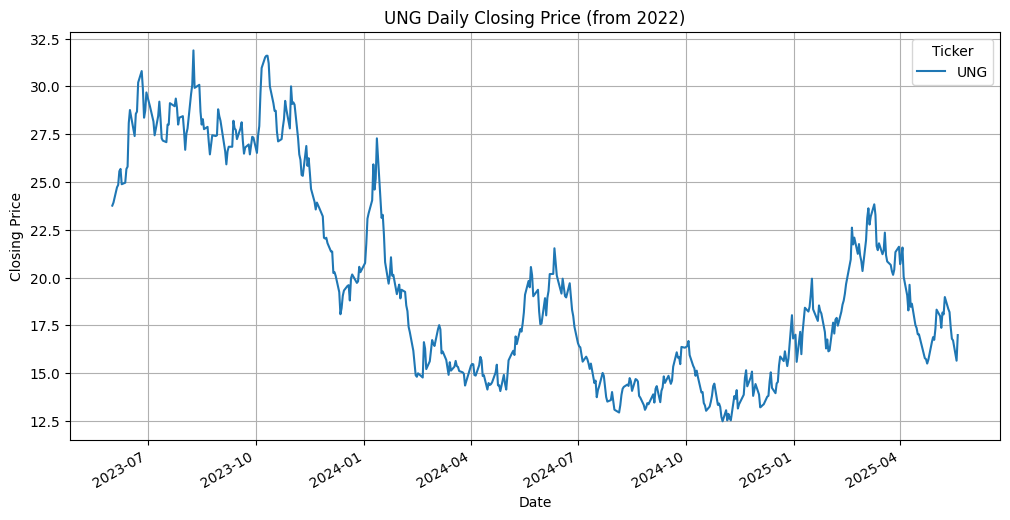

[*********************100%***********************]  1 of 1 completed

Data for JJN:
Price           Close       High        Low       Open Volume
Ticker            JJN        JJN        JJN        JJN    JJN
Date                                                         
2023-06-01  28.465000  28.487900  27.690001  27.700001   3024
2023-06-02  27.905001  28.504999  27.799999  28.504999   4820
2023-06-05  27.684999  27.986000  27.500000  27.860001   4355
2023-06-06  27.939301  27.955999  27.620001  27.951300   2640
2023-06-07  28.400000  28.480000  28.170000  28.170000   4155


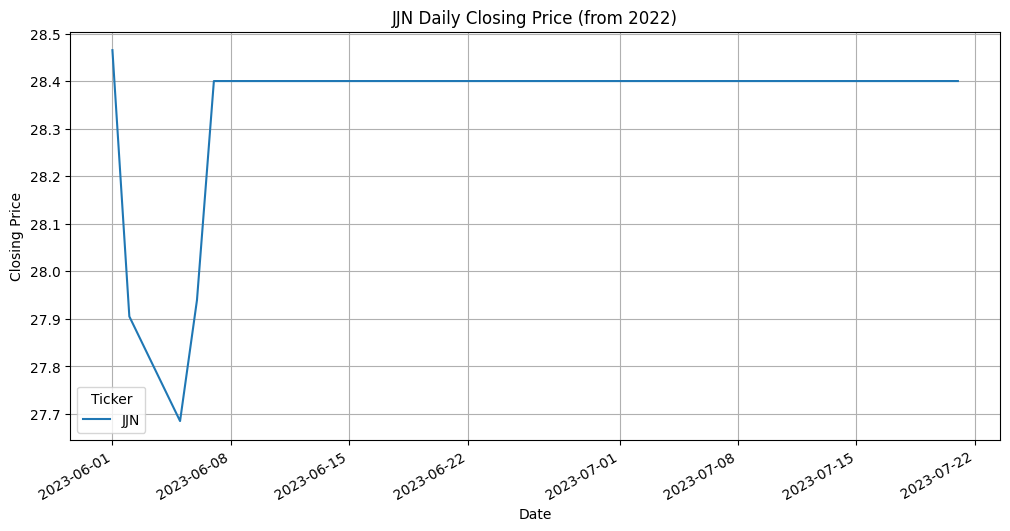

LIT columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
REMX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
URA columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDXJ columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
XLE columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
ICLN columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
SPY columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GLD columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
CPER columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
USO columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
UNG columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
JJN columns: Index(['Open', 'High', 'Low', 'Clos

In [5]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG',  'JJN']#'KOL',

# Fetch data from Yahoo Finance
all_data = {}
for symbol in symbols:
    # Download data
    data = yf.download(symbol, start='2023-06-01')
    all_data[symbol] = data
    
    # Print the first few rows of the dataset
    print(f"Data for {symbol}:")
    print(data.head())
    
    # Plot the data
    data['Close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2022)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

# Adjust column names based on the number of columns
for symbol, df in all_data.items():
    if symbol == 'KOL' and len(df.columns) == 6:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    else:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Verify the column names
for symbol, df in all_data.items():
    print(f"{symbol} columns: {df.columns}")

In [6]:
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
# all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']#
all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[33795053.92119406 15023976.85013561 19926952.54904903 18965140.6530262
 20282277.08158771 14704007.19403151 27164857.07698559 33392337.22499166
 32075456.77198738 32782789.33626115 20489274.92774941 24338717.48550357
 11705668.58530712 24490657.449555   25183208.53740475 26084622.7837433
 25166004.77415184 23227283.07183741 27108986.73986409 24443061.31461614
 21125323.26601827 32407793.79966823 39821104.46072038 29602416.30945002
 25371874.95743483 24031222.04310495 22667329.73747686 31069415.83490399
 24542513.4919966  29323742.86247968 28234686.12111848 20653723.45224156
 31083143.80828629 20489195.16127351 16318182.15670982 16375837.44198676
 18037118.15295942 12189947.29010263 10737876.0476604  20237888.97800595
 19843272.31773026 15449572.99099722 16904455.94987834 181098


Data for LIT:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2023-06-01  60.102169  60.268849  59.131516  59.386434  337600      NaN   
2023-06-02  62.102306  62.474882  61.102237  61.533638  547700      NaN   
2023-06-05  61.719929  62.063088  61.455204  61.886605  243100      NaN   
2023-06-06  62.641556  62.778820  61.278718  61.366959  322400      NaN   
2023-06-07  61.896408  62.612143  61.690509  62.484682  304600      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0       1 

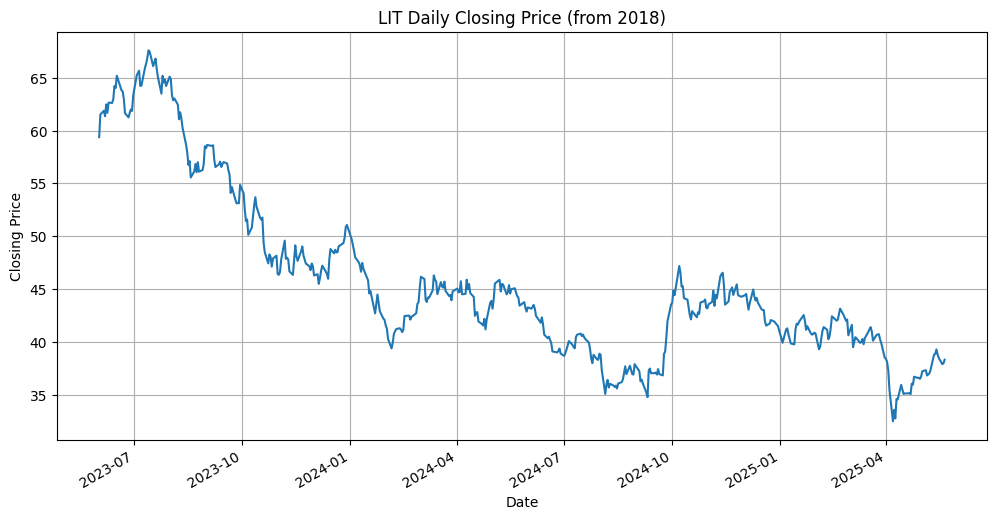

Number of technical indicators successfully added to LIT: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 5202947.34654154  9732867.64380328  4220577.89135415  7229765.78102071
 11047462.93403321 10244450.45054273  2982461.31934735  2528710.14420982
  3923301.47423168  5589623.99773873 13973268.26202782  5691430.92580634
  6169617.31005794  3658873.17642302  4450118.27798524  7499642.97766325
 10133973.51069779  4587410.93656647  3405418.1029786  20062441.95246935
  3285510.99155092 10015874.45978591  2729622.23023476  3857300.80190033
 15784435.59747476  3867088.75098056 10297479.0385561   5125993.13416958
  3448175.22915516  7089924.46212831  4671966.48664387  8720412.82566437
  1652949.41172492  5073972.59508059  4428508.51544801 10462912.47392983
 18637532.22270267 23543019.55724027  5368774.97301079  7201108.45311619
  7320984.76225029  8452402.01326619  9690001.17681056  286


Data for REMX:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2023-06-01  78.765999  79.312170  76.864141  77.068955   96100      NaN   
2023-06-02  82.101555  82.316124  81.340815  81.379828   63700      NaN   
2023-06-05  81.448105  82.267361  80.979953  81.457853   42900      NaN   
2023-06-06  82.813538  82.813538  80.882421  80.882421   74900      NaN   
2023-06-07  82.062546  82.979339  81.750447  82.716001  118000      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0       1

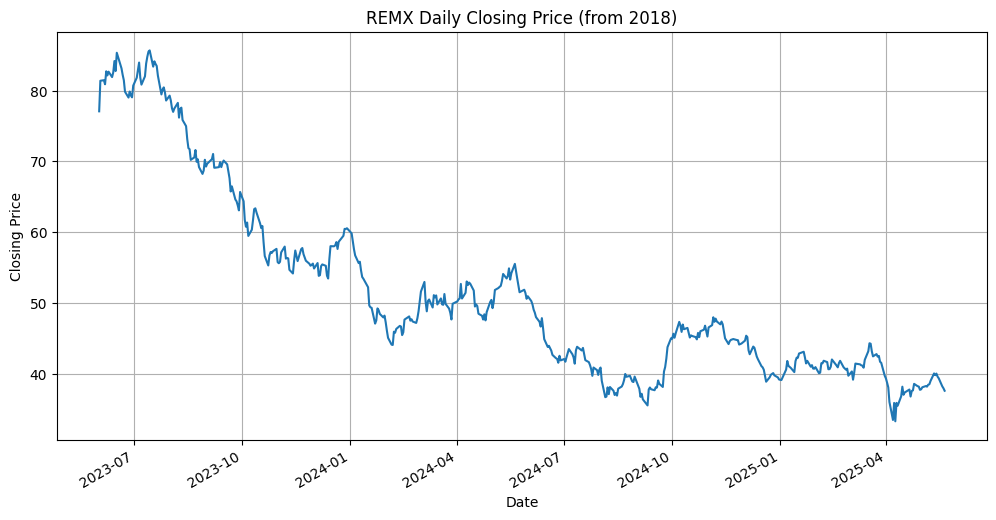

Number of technical indicators successfully added to REMX: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.04941399e+07 2.72300549e+07 2.73542828e+07 1.60814843e+07
 4.49043135e+07 7.26357808e+07 1.84822777e+07 1.85379749e+07
 1.08342322e+07 2.14113659e+07 2.20817713e+07 2.05593875e+07
 2.62012257e+07 2.06699472e+07 1.96448168e+07 1.92678929e+07
 3.81157173e+07 4.55529266e+07 2.97022797e+07 1.48726839e+07
 1.97867080e+07 3.44358282e+07 2.90949846e+07 1.80755626e+07
 6.01267001e+07 2.95604329e+07 3.10111973e+07 3.22141573e+07
 3.94041073e+07 3.62951488e+07 3.71758151e+07 5.63767484e+07
 8.01637277e+07 2.44800219e+07 5.26215654e+07 4.42785997e+07
 5.13434605e+07 1.57039415e+08 1.10055107e+08 5.20636470e+07
 8.88231477e+07 1.20494299e+08 7.57960901e+07 1.16169581e+08
 8.73423183e+07 6.02456079e+07 3.75143444e+07 6.40145119e+07
 4.87690319e+07 3.80256671e+07 1.38569366e+08 8.68185060e


Data for URA:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2023-06-01  19.354025  19.665891  18.253321  18.381738  4169300      NaN   
2023-06-02  19.546648  19.803479  19.454922  19.675065  1552300      NaN   
2023-06-05  19.830997  20.041965  19.583339  19.583339  1379700      NaN   
2023-06-06  19.830997  19.849341  19.363199  19.711754  1839100      NaN   
2023-06-07  19.601685  20.005274  19.583339  19.812652  1381500      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.ta.decay(length=5, mode="linear", append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:232: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data.ta.decay(length=5, mode="linear", append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:238: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

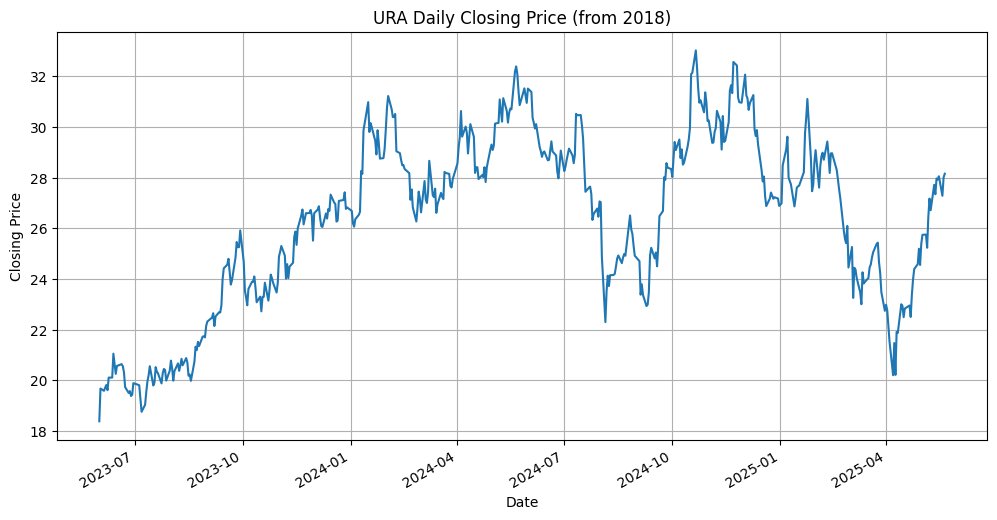

Number of technical indicators successfully added to URA: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.23351051e+08 3.48700795e+08 7.09168093e+08 5.33925953e+08
 5.86545000e+08 4.39571017e+08 6.00353804e+08 5.24215677e+08
 6.59177436e+08 4.79234029e+08 7.18468608e+08 4.36308340e+08
 1.34038387e+09 6.11158312e+08 4.78609412e+08 6.60455619e+08
 3.29628959e+08 4.29537639e+08 4.52619322e+08 5.82403736e+08
 5.01994103e+08 2.71407269e+08 4.79997262e+08 4.88212184e+08
 3.70888440e+08 8.46090949e+08 4.75592845e+08 5.06592929e+08
 5.54909260e+08 4.19893262e+08 5.97734078e+08 4.77944516e+08
 3.78927697e+08 2.94175417e+08 4.37952299e+08 7.11820060e+08
 3.17527964e+08 3.79437862e+08 6.32406742e+08 4.26536214e+08
 6.11351207e+08 4.53912522e+08 3.95256888e+08 6.60316992e+08
 6.14116924e+08 5.09918682e+08 6.10418933e+08 9.64575143e+08
 4.60684561e+08 4.99061913e+08 6.71149433e+08 8.58815747e


Data for GDX:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2023-06-01  31.127438  31.399720  30.174460  30.223081  32224600      NaN   
2023-06-02  30.543982  31.360822  30.349495  31.176062  26592200      NaN   
2023-06-05  30.689848  30.894059  30.359222  30.398120  12300700      NaN   
2023-06-06  30.757917  30.825989  30.378671  30.777366  11372900      NaN   
2023-06-07  30.193909  31.351101  30.077218  30.825989  23061300      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0    

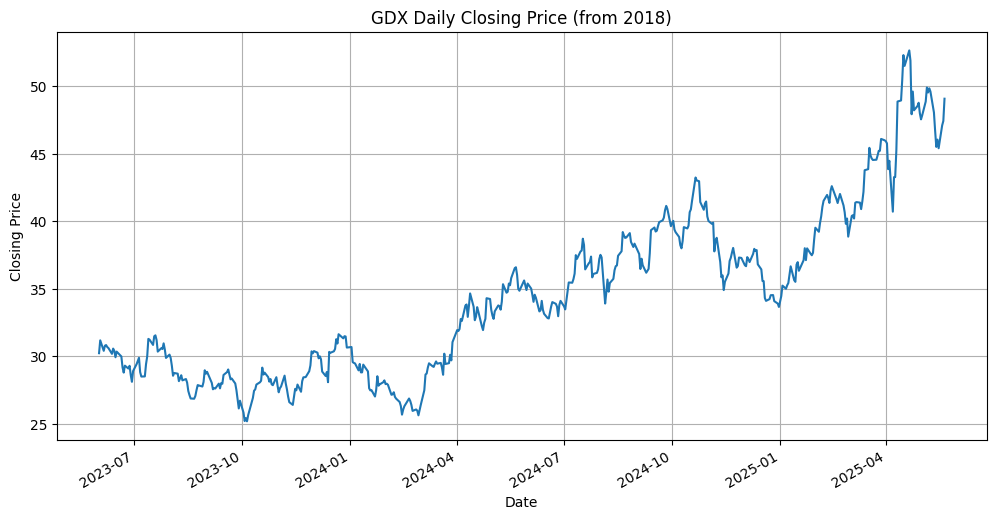

Number of technical indicators successfully added to GDX: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.18315367e+08 1.26813859e+08 2.07650139e+08 2.32643876e+08
 1.97882925e+08 1.71876960e+08 1.62025487e+08 1.38403356e+08
 1.92699301e+08 3.28363447e+08 1.59446161e+08 3.93363450e+08
 1.48563751e+08 2.20107894e+08 1.03764127e+08 1.54260749e+08
 1.63727733e+08 2.46918472e+08 1.96384573e+08 1.05475851e+08
 1.81778038e+08 1.86076625e+08 1.43207913e+08 4.31463971e+08
 2.67988405e+08 2.17923430e+08 2.26733623e+08 1.44558723e+08
 2.37600262e+08 1.15013094e+08 1.37070398e+08 1.07937967e+08
 2.01014292e+08 2.77495709e+08 1.05553649e+08 2.59715584e+08
 2.33952175e+08 2.38393903e+08 2.05684779e+08 1.47828330e+08
 1.88840464e+08 3.99201885e+08 1.65559442e+08 2.42371247e+08
 2.29926260e+08 2.89487087e+08 1.39871872e+08 3.07813701e+08
 2.12172292e+08 3.06384925e+08 5.44615725e+08 1.93354868e


Data for GDXJ:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2023-06-01  37.259502  37.627260  36.136879  36.185267  8033300      NaN   
2023-06-02  36.359467  37.530479  36.040101  37.065945  5919800      NaN   
2023-06-05  36.649799  36.872388  36.165910  36.320754  3216100      NaN   
2023-06-06  36.949810  36.978842  36.214296  36.659477  3463200      NaN   
2023-06-07  35.991707  37.695000  35.827186  36.785285  5647400      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0 

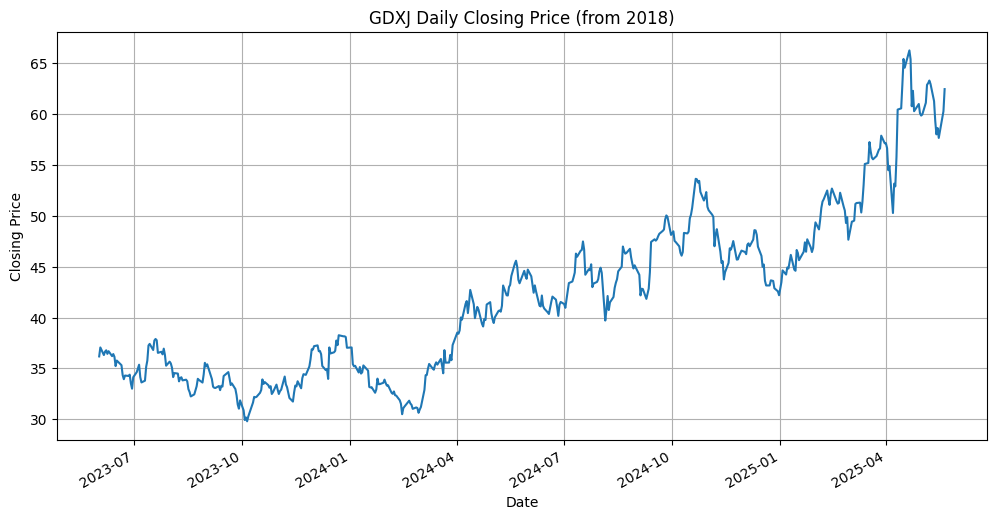

Number of technical indicators successfully added to GDXJ: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.04981104e+09 1.42438812e+09 2.29923700e+09 1.76546040e+09
 1.53317206e+09 1.80166243e+09 1.19653744e+09 1.05509054e+09
 1.22641015e+09 1.07533554e+09 1.37764686e+09 7.51592173e+08
 1.18114860e+09 1.53954095e+09 1.70713598e+09 1.66652044e+09
 1.45970856e+09 1.39402776e+09 1.24782615e+09 1.79248235e+09
 1.36105547e+09 1.44868323e+09 1.48789742e+09 1.69978436e+09
 1.78421159e+09 2.17568409e+09 1.64410301e+09 1.96099902e+09
 1.27554242e+09 1.68807761e+09 1.27800307e+09 1.37281779e+09
 1.56729616e+09 1.06991168e+09 1.12497882e+09 1.16896066e+09
 1.24368348e+09 1.52290272e+09 2.10601024e+09 1.32688385e+09
 1.50822778e+09 1.91671784e+09 2.33289102e+09 1.58964286e+09
 1.63425494e+09 1.47809381e+09 1.58940760e+09 1.43026275e+09
 2.01139327e+09 2.12127718e+09 2.08841265e+09 2.57748629e


Data for XLE:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2023-06-01  72.582077  73.396452  71.374559  71.861307  25811800      NaN   
2023-06-02  74.791183  75.146884  73.433892  73.939366  27635400      NaN   
2023-06-05  74.295067  75.886366  74.164019  75.886366  18913100      NaN   
2023-06-06  74.894150  74.959674  73.237320  73.312206  17375400      NaN   
2023-06-07  76.878586  76.972198  75.212401  75.259206  30327100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0    

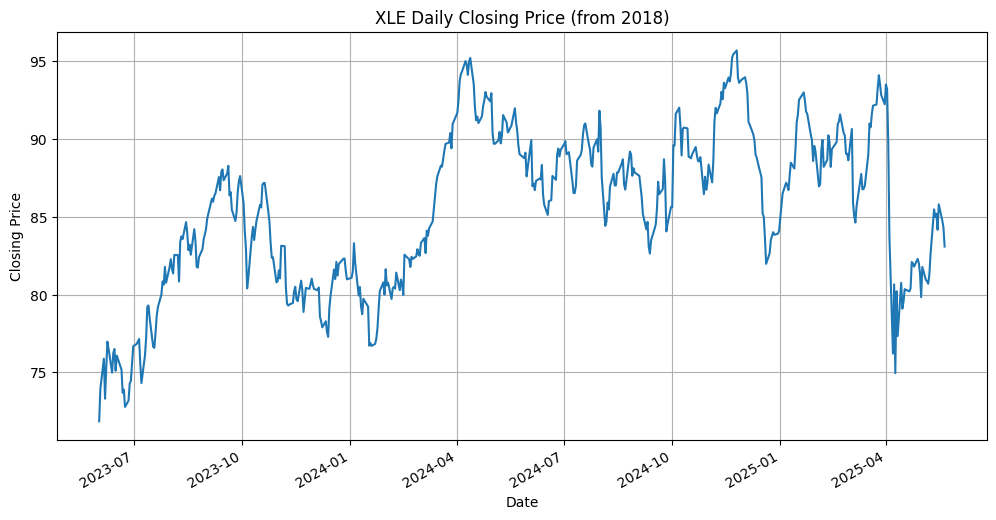

Number of technical indicators successfully added to XLE: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.61762965e+07 5.19032303e+07 7.16779769e+07 3.64170196e+07
 5.27631355e+07 4.94023419e+07 4.22925013e+07 4.12862571e+07
 3.88547710e+07 5.39546346e+07 1.86669625e+07 4.69529713e+07
 3.71564177e+07 5.08557078e+07 1.17986870e+08 3.57157313e+07
 5.16864796e+07 2.61109778e+07 3.56838788e+07 4.50413779e+07
 3.85419609e+07 3.50049589e+07 2.79931526e+07 3.35885092e+07
 2.05746965e+07 3.90420784e+07 3.69595930e+07 2.93578209e+07
 2.96546162e+07 3.21832677e+07 2.70424106e+07 3.56913705e+07
 2.46670737e+07 2.99681472e+07 2.76788857e+07 6.77895272e+07
 2.56257478e+07 9.19938333e+07 6.08754976e+07 3.66713192e+07
 3.15312173e+07 3.67937372e+07 4.85262904e+07 3.37726610e+07
 2.22200547e+07 8.34364764e+07 8.06592363e+07 3.78843051e+07
 3.92623122e+07 6.30330371e+07 4.22639286e+07 6.35352639e


Data for ICLN:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2023-06-01  18.102161  18.170032  17.724024  17.869461  3202000      NaN   
2023-06-02  18.199120  18.325165  18.043986  18.257294  3634300      NaN   
2023-06-05  18.131250  18.237904  18.043988  18.111858  3783000      NaN   
2023-06-06  18.140944  18.315469  17.956724  18.160336  2860600      NaN   
2023-06-07  18.087261  18.292243  18.038455  18.282481  3937400      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0 

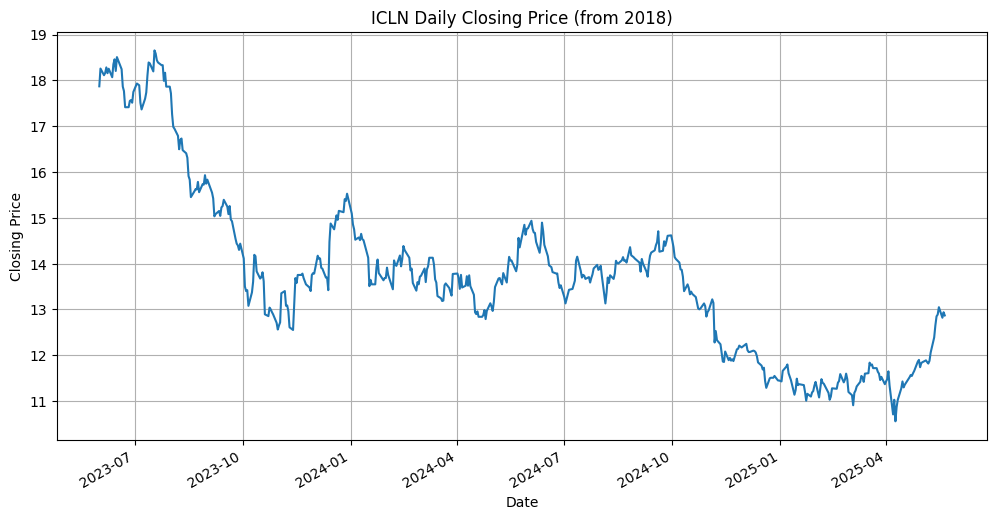

Number of technical indicators successfully added to ICLN: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.78604306e+10 2.72756961e+10 3.55702360e+10 3.59091808e+10
 3.19750367e+10 4.06750464e+10 4.27514629e+10 4.71126534e+10
 4.92642168e+10 3.08500696e+10 3.21901730e+10 2.89539175e+10
 4.53355328e+10 1.41993874e+10 3.69885628e+10 2.77704039e+10
 4.00767865e+10 3.17394995e+10 3.06767946e+10 3.56398157e+10
 2.93015611e+10 2.39386616e+10 2.45247927e+10 3.15802771e+10
 4.11320768e+10 2.77115495e+10 4.39822922e+10 4.07240475e+10
 2.08442062e+10 2.93824044e+10 2.79664080e+10 2.94650238e+10
 3.82451367e+10 2.65898837e+10 3.61074587e+10 3.03571868e+10
 2.91525499e+10 2.60084615e+10 2.68371129e+10 2.63291294e+10
 3.66207151e+10 3.58011231e+10 3.86100673e+10 4.84923893e+10
 2.91323466e+10 4.71200261e+10 3.38171098e+10 3.34645938e+10
 2.66421628e+10 3.46239139e+10 3.21586784e+10 3.25609811e


Data for SPY:
                  open        high         low       close    volume  SMA_100  \
Date                                                                            
2023-06-01  410.573212  411.643889  405.677325  406.942652  88865000      NaN   
2023-06-02  416.510498  417.308612  412.646348  413.181672  91366700      NaN   
2023-06-05  415.712433  418.165233  415.001886  416.860964  65460200      NaN   
2023-06-06  416.617645  417.152969  414.632028  415.293921  64022200      NaN   
2023-06-07  415.177063  418.165216  414.748792  417.016685  85373300      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     N

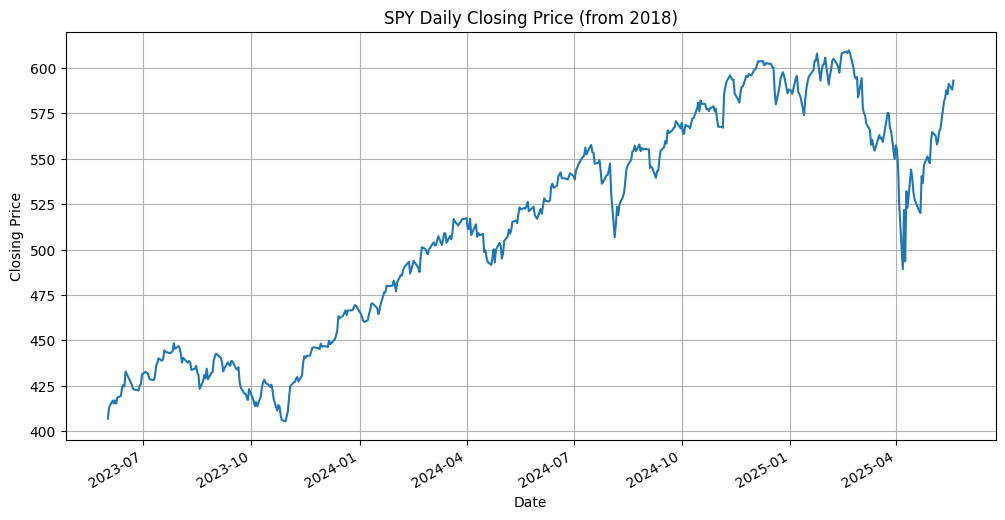

Number of technical indicators successfully added to SPY: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.04907937e+08 1.16585757e+09 1.59758813e+09 9.70762783e+08
 1.14188233e+09 7.30536784e+08 1.01081701e+09 9.29778980e+08
 5.05902035e+08 1.28111741e+09 8.23474089e+08 1.50932995e+09
 7.17335270e+08 1.12618661e+09 6.95565333e+08 1.00340540e+09
 9.60170471e+08 1.03588186e+09 1.41125676e+09 9.82888685e+08
 8.43670749e+08 1.35320601e+09 1.19071232e+09 8.96842688e+08
 5.87538410e+08 6.59488114e+08 6.87544502e+08 1.00403520e+09
 9.03168318e+08 7.57939325e+08 1.67692568e+09 6.49550858e+08
 1.68321444e+09 1.75166554e+09 1.00668744e+09 1.23787225e+09
 1.02788347e+09 3.33769455e+09 1.49179059e+09 1.46933926e+09
 2.51808713e+09 2.43682827e+09 2.35096990e+09 1.84847635e+09
 1.40836674e+09 2.60238967e+09 1.62276520e+09 1.35102050e+09
 1.57587491e+09 1.24351059e+09 1.51302251e+09 8.95535512e


Data for GLD:
                  open        high         low       close   volume  SMA_100  \
Date                                                                           
2023-06-01  183.759995  184.210007  182.720001  182.809998  7300500      NaN   
2023-06-02  181.050003  183.559998  180.960007  183.529999  8724800      NaN   
2023-06-05  182.139999  182.440002  180.600006  180.789993  5748800      NaN   
2023-06-06  182.339996  182.649994  181.520004  182.360001  4967200      NaN   
2023-06-07  180.149994  183.000000  180.149994  181.940002  9066500      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN     

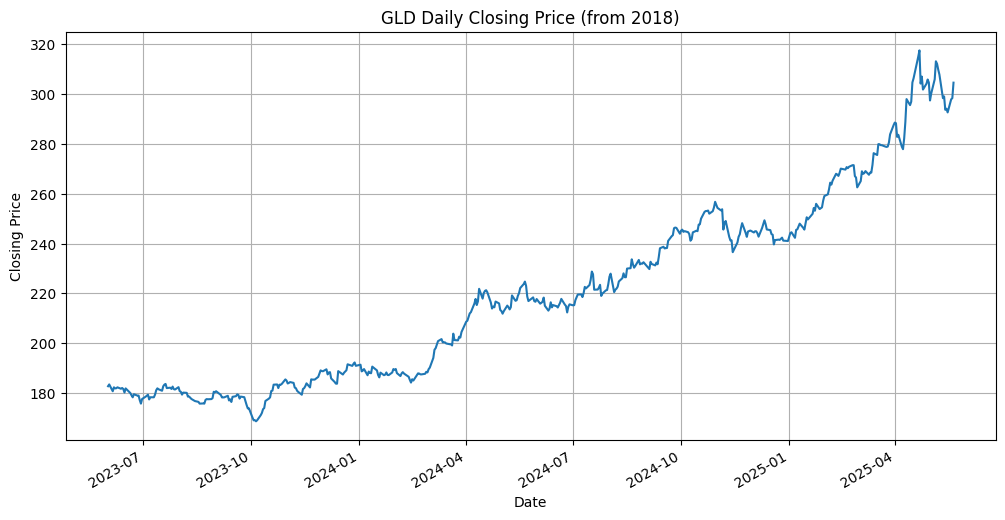

Number of technical indicators successfully added to GLD: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 1627329.99102275  1096616.67029063   698525.99385579   746217.99755096
   802240.00263214  1177512.00256348  2525632.01090495  1251536.01074219
  1354941.01009369  2622107.04447428   950682.69392649  1045506.00662231
  1949921.31830851   805345.00789642   470621.6744105   1111250.99029541
  1022292.00668335  1182999.99237061  5818543.35784912  4745312.14396159
   671817.99354553  1942759.66040293  6128459.96793111   824424.3411382
  9775278.13135783   751715.99680583  5223308.98303986  1618151.96050008
  1055079.34265137  5262166.06903076  1564901.34862264   602086.00196838
   745497.99919128   624623.99597168   839519.99104818   908178.65778605
  1242496.66531881   656600.00356038   697158.00075531  1034571.33560181
  2489474.01657104   804789.3351237   3250727.95715332   683


Data for CPER:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2023-06-01  22.840000  22.959999  22.719999  22.750000   38800      NaN   
2023-06-02  22.980000  23.139999  22.870001  23.139999   70600      NaN   
2023-06-05  23.150000  23.340000  22.920000  23.000000   47500      NaN   
2023-06-06  23.170000  23.250000  22.980000  23.160000   30200      NaN   
2023-06-07  23.129999  23.410000  23.059999  23.270000   32100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-06     NaN     NaN     NaN      NaN  ...       0        0       1

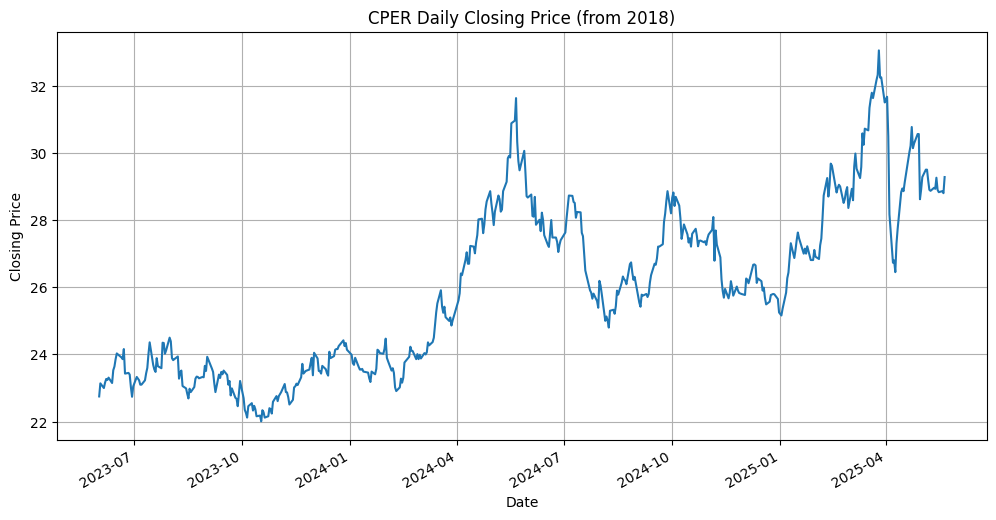

Number of technical indicators successfully added to CPER: 39

Data for USO:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2023-06-01  62.549999  63.369999  60.630001  60.660000  3631400      NaN   
2023-06-02  64.150002  64.360001  63.459999  64.099998  6934800      NaN   
2023-06-05  64.029999  65.410004  64.019997  65.370003  3038400      NaN   
2023-06-06  63.790001  64.430000  63.009998  63.080002  2569500      NaN   
2023-06-07  64.709999  65.209999  64.209999  64.489998  3520500      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.43642268e+08 1.97293443e+08 2.27553380e+08 2.16202222e+08
 3.01098251e+08 2.16062089e+08 1.89549258e+08 1.74995269e+08
 1.30190924e+08 1.25269536e+08 1.98901473e+08 7.77446130e+07
 1.91192236e+08 1.80266987e+08 1.60899299e+08 1.55826673e+08
 2.05973896e+08 2.45896816e+08 1.63472585e+08 1.71332723e+08
 1.32095997e+08 2.05519326e+08 1.69276857e+08 1.65429471e+08
 9.79669099e+07 1.28835290e+08 1.25191382e+08 1.50753846e+08
 2.10995429e+08 1.48186493e+08 1.36727136e+08 3.57247459e+08
 1.52492119e+08 2.23735540e+08 1.17431289e+08 2.09843043e+08
 1.63988162e+08 2.16208510e+08 3.20859250e+08 3.73394173e+08
 2.08449346e+08 1.59551750e+08 1.64057576e+08 2.63248128e+08
 2.21896703e+08 2.50318814e+08 4.84234621e+08 5.44950210e+08
 2.50933018e+08 2.02581222e+08 3.51390297e+08 5.29290322e

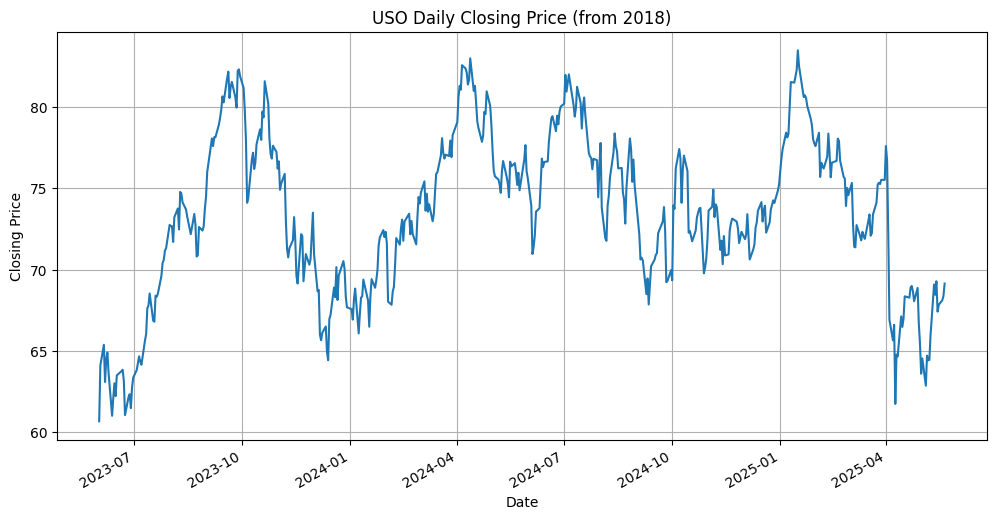

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.24968736e+08 1.35100142e+08 1.02411215e+08 9.90847368e+07
 8.50142057e+07 2.43597360e+08 1.35064778e+08 1.35938021e+08
 1.06039959e+08 1.82897523e+08 1.43500395e+08 1.79083368e+08
 9.72930313e+07 1.46671068e+08 9.49359966e+07 1.44190494e+08
 9.87702000e+07 1.87067437e+08 1.06939118e+08 1.11036018e+08
 1.20613618e+08 9.61036805e+07 1.47467834e+08 1.32885499e+08
 2.60066632e+08 7.40558921e+07 6.58880006e+07 9.07404287e+07
 1.00018133e+08 1.83101005e+08 1.29129756e+08 1.52383097e+08
 1.05401826e+08 1.42227932e+08 1.04063375e+08 2.18309098e+08
 1.64683407e+08 1.66743072e+08 1.33970084e+08 7.80813637e+07
 8.79799442e+07 1.07222472e+08 1.08238630e+08 1.28573398e+08
 2.08217846e+08 2.47229950e+08 1.47552449e+08 1.17918572e+08
 1.30417312e+08 7.38861572e+07 7.84397537e+07 8.86256000e

Number of technical indicators successfully added to USO: 39

Data for UNG:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2023-06-01  23.760000  24.120001  23.480000  23.959999  8095700      NaN   
2023-06-02  23.920000  24.520000  23.760000  24.080000  5181125      NaN   
2023-06-05  24.719999  25.440001  24.400000  25.200001  5401125      NaN   
2023-06-06  24.840000  25.160000  24.440001  24.600000  3288800      NaN   
2023-06-07  25.559999  25.760000  24.920000  25.440001  4036175      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2023-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-02     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2023-0

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.ta.decay(length=5, mode="linear", append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:232: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data.ta.decay(length=5, mode="linear", append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:238: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

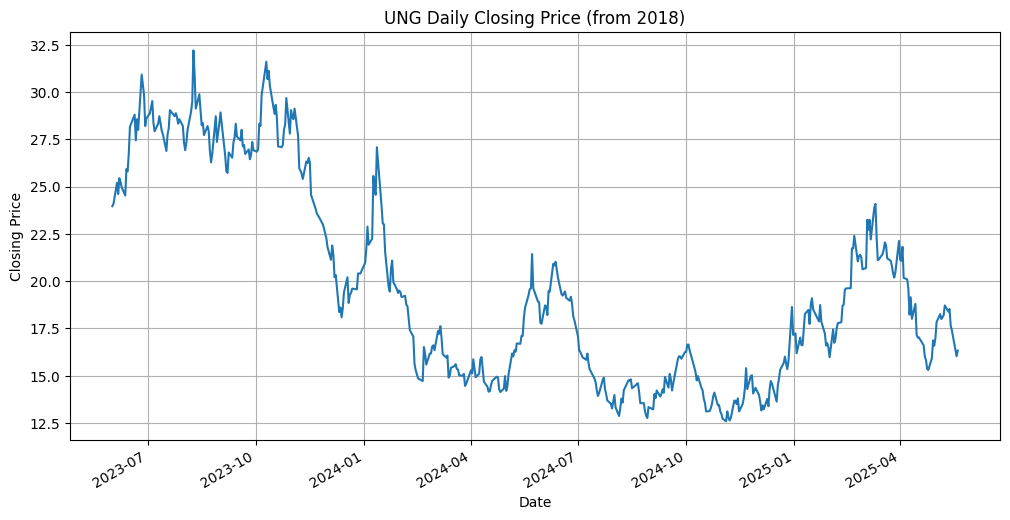

Number of technical indicators successfully added to UNG: 39

Data for JJN:
                 open       high        low      close  volume  EMA_20  \
Date                                                                     
2023-06-01  28.465000  28.487900  27.690001  27.700001    3024     NaN   
2023-06-02  27.905001  28.504999  27.799999  28.504999    4820     NaN   
2023-06-05  27.684999  27.986000  27.500000  27.860001    4355     NaN   
2023-06-06  27.939301  27.955999  27.620001  27.951300    2640     NaN   
2023-06-07  28.400000  28.480000  28.170000  28.170000    4155     NaN   

            WMA_20  HMA_20  VWMA_20  MACD_12_26_9  ...  SQZ_ON  SQZ_OFF  \
Date                                               ...                    
2023-06-01     NaN     NaN      NaN           NaN  ...       0        0   
2023-06-02     NaN     NaN      NaN           NaN  ...       0        0   
2023-06-05     NaN     NaN      NaN           NaN  ...       0        0   
2023-06-06     NaN     NaN    

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[136261.39607747  73504.02389526 117475.69957733      0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[120990.61097463]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_6643/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

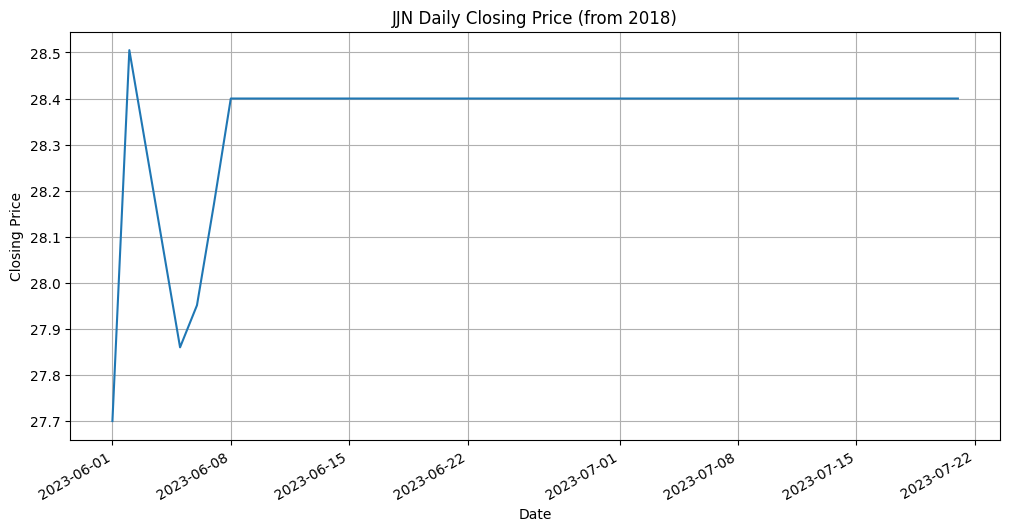

Number of technical indicators successfully added to JJN: 39


In [7]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=12, slow=26, signal=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=14, d=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=7, multiplier=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.02, max_step=0.2, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=20, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=20, scalar=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=20, upper_length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=3, slow=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [8]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_open', 'LIT_high', 'LIT_low', 'LIT_close', 'LIT_volume',
       'LIT_SMA_100', 'LIT_EMA_20', 'LIT_WMA_20', 'LIT_HMA_20', 'LIT_VWMA_20',
       'LIT_MACD_12_26_9', 'LIT_MACDh_12_26_9', 'LIT_MACDs_12_26_9',
       'LIT_ADX_14', 'LIT_DMP_14', 'LIT_DMN_14', 'LIT_CCI_20_0.015',
       'LIT_RSI_14', 'LIT_STOCHk_14_3_3', 'LIT_STOCHd_14_3_3', 'LIT_ISA_9',
       'LIT_ISB_26', 'LIT_ITS_9', 'LIT_IKS_26', 'LIT_ICS_26',
       'LIT_SUPERT_7_3.0', 'LIT_SUPERTd_7_3.0', 'LIT_SUPERTl_7_3.0',
       'LIT_SUPERTs_7_3.0', 'LIT_PSARl_0.02_0.2', 'LIT_PSARs_0.02_0.2',
       'LIT_PSARaf_0.02_0.2', 'LIT_PSARr_0.02_0.2', 'LIT_MOM_50', 'LIT_ROC_10',
       'LIT_WILLR_14', 'LIT_UO_7_14_28', 'LIT_AO_5_34', 'LIT_KAMA_10_2_30',
       'LIT_CG_10', 'LIT_BBL_20_2.0', 'LIT_BBM_20_2.0', 'LIT_BBU_20_2.0',
       'LIT_BBB_20_2.0', 'LIT_BBP_20_2.0', 'LIT_ATRr_14', 'LIT_KCLe_20_2.0',
       'LIT_KCBe_20_2.0', 'LIT_KCUe_20_2.0', 'LIT_DCL_20_20', 'LIT_DCM_20_20',
       'LIT_DCU_

In [9]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
             LIT_open   LIT_high    LIT_low  LIT_close  LIT_volume  \
Date                                                                 
2023-06-01  60.102169  60.268849  59.131516  59.386434      337600   
2023-06-02  62.102306  62.474882  61.102237  61.533638      547700   
2023-06-05  61.719929  62.063088  61.455204  61.886605      243100   
2023-06-06  62.641556  62.778820  61.278718  61.366959      322400   
2023-06-07  61.896408  62.612143  61.690509  62.484682      304600   

            LIT_SMA_100  LIT_EMA_20  LIT_WMA_20  LIT_HMA_20  LIT_VWMA_20  ...  \
Date                                                                      ...   
2023-06-01          NaN         NaN         NaN         NaN          NaN  ...   
2023-06-02          NaN         NaN         NaN         NaN          NaN  ...   
2023-06-05          NaN         NaN         NaN         NaN          NaN  ...   
2023-06-06          NaN         NaN         NaN         NaN          NaN  ...   

In [10]:
merged_data


,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-01,60.102169,60.268849,59.131516,59.386434,337600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.700001,NaN,NaN,NaN,NaN
2023-06-02,62.102306,62.474882,61.102237,61.533638,547700,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,28.504999,NaN,NaN,NaN,NaN
2023-06-05,61.719929,62.063088,61.455204,61.886605,243100,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,28.304999,NaN,NaN,NaN,NaN
2023-06-06,62.641556,62.778820,61.278718,61.366959,322400,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.951300,NaN,NaN,NaN,NaN
2023-06-07,61.896408,62.612143,61.690509,62.484682,304600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,28.170000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,38.740002,38.970001,38.470001,38.820000,128900,39.510296,37.448244,37.555428,38.613898,36.994942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-16,38.580002,38.599998,38.299999,38.480000,143500,39.475799,37.546506,37.702047,38.847856,37.147546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-19,38.200001,38.259998,37.889999,37.889999,220500,39.439290,37.579220,37.776428,38.924853,37.312762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data

,JJN_open,JJN_high,JJN_low,JJN_close,JJN_volume,JJN_EMA_20,JJN_WMA_20,JJN_HMA_20,JJN_VWMA_20,JJN_MACD_12_26_9,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-01,28.465000,28.487900,27.690001,27.700001,3024,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.700001,NaN,NaN,NaN,NaN
2023-06-02,27.905001,28.504999,27.799999,28.504999,4820,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.504999,NaN,NaN,NaN,NaN
2023-06-05,27.684999,27.986000,27.500000,27.860001,4355,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.304999,NaN,NaN,NaN,NaN
2023-06-06,27.939301,27.955999,27.620001,27.951300,2640,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.951300,NaN,NaN,NaN,NaN
2023-06-07,28.400000,28.480000,28.170000,28.170000,4155,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.170000,NaN,NaN,NaN,NaN
2023-06-08,28.400000,28.400000,28.400000,28.400000,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.400000,NaN,NaN,NaN,NaN
2023-06-09,28.400000,28.400000,28.400000,28.400000,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.400000,NaN,NaN,NaN,NaN
2023-06-12,28.400000,28.400000,28.400000,28.400000,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,28.400000,NaN,NaN,NaN,NaN
2023-06-13,28.400000,28.400000,28.400000,28.400000,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0.000000,NaN,28.400000,NaN,NaN,NaN,NaN


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import iqr

def fill_nan_with_rolling_median(data, window_size=21):
    """
    Fill NaN values in a DataFrame using forward fill first, then rolling median.
    Any remaining NaNs (e.g., at the start) are set to zero.
    """
    # Forward fill first
    data_ffill = data.ffill()
    # Fill remaining NaNs with rolling median
    data_filled = data_ffill.apply(lambda x: x.fillna(x.rolling(window=window_size, min_periods=1).median()), axis=0)
    # Fill any remaining NaNs (e.g., at the very start) with zero
    data_filled = data_filled.fillna(0)
    return data_filled

# Usage example with your existing pipeline
# First handle missing values
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

In [13]:
merged_data_filled.describe()

,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
count,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,45.686851,46.068133,45.290179,45.624180,3.900382e+05,35.609547,43.702432,43.538992,42.871722,43.674625,...,0.002020,0.008081,0.989899,-7.247558,-7.229393,28.397235,0.011213,0.005942,0.216167,3.201146
std,7.947074,7.975884,7.887398,7.959040,2.068480e+05,18.372531,11.388592,11.368207,11.703686,11.441448,...,0.044947,0.089620,0.100096,1.540459,1.573785,0.039236,0.114226,0.062052,0.045215,0.622475
min,31.820000,34.000000,31.440001,32.480000,5.550000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.597371,-7.594340,27.700001,0.000000,0.000000,0.000000,0.000000
25%,40.624283,40.855000,40.285957,40.442166,2.411000e+05,39.626129,40.606122,40.419613,39.816445,40.517240,...,0.000000,0.000000,1.000000,-7.597371,-7.594340,28.400000,0.000000,0.000000,0.223607,3.321928
50%,43.669914,44.142841,43.392516,43.724145,3.488000e+05,42.064760,43.333982,43.485458,43.055224,43.532305,...,0.000000,0.000000,1.000000,-7.597371,-7.594340,28.400000,0.000000,0.000000,0.223607,3.321928
75%,48.008459,48.372419,47.591697,47.880581,4.992500e+05,44.975915,47.716061,47.556131,46.780334,47.574340,...,0.000000,0.000000,1.000000,-7.597371,-7.594340,28.400000,0.000000,0.000000,0.223607,3.321928
max,67.716461,67.962381,67.372175,67.598425,1.273800e+06,59.245685,65.245072,65.727890,67.647386,65.485983,...,1.000000,1.000000,1.000000,1.725175,1.725175,28.504999,1.436667,0.810033,0.420808,3.325282


In [14]:
pd.set_option('display.max_rows', None)
merged_data_filled.isna().sum().transpose()

LIT_open                  0
LIT_high                  0
LIT_low                   0
LIT_close                 0
LIT_volume                0
LIT_SMA_100               0
LIT_EMA_20                0
LIT_WMA_20                0
LIT_HMA_20                0
LIT_VWMA_20               0
LIT_MACD_12_26_9          0
LIT_MACDh_12_26_9         0
LIT_MACDs_12_26_9         0
LIT_ADX_14                0
LIT_DMP_14                0
LIT_DMN_14                0
LIT_CCI_20_0.015          0
LIT_RSI_14                0
LIT_STOCHk_14_3_3         0
LIT_STOCHd_14_3_3         0
LIT_ISA_9                 0
LIT_ISB_26                0
LIT_ITS_9                 0
LIT_IKS_26                0
LIT_ICS_26                0
LIT_SUPERT_7_3.0          0
LIT_SUPERTd_7_3.0         0
LIT_SUPERTl_7_3.0         0
LIT_SUPERTs_7_3.0         0
LIT_PSARl_0.02_0.2        0
LIT_PSARs_0.02_0.2        0
LIT_PSARaf_0.02_0.2       0
LIT_PSARr_0.02_0.2        0
LIT_MOM_50                0
LIT_ROC_10                0
LIT_WILLR_14        

In [15]:
pd.reset_option('display.max_rows')

In [16]:
print(merged_data_filled.shape)

(495, 915)


In [17]:


# Print statistics to prove no NaNs remain
print('NaN count per column after filling:')
print(merged_data_filled.isna().sum())
print('Any NaNs left in data:', merged_data_filled.isna().any().any())
print('Any zeros in data:', (merged_data_filled == 0).any().any())

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    Automatically detects and applies optimal scaling for financial time series features.
    Handles mixed-scale features like RSI (0-100) and ATR (volatility) without hardcoding.
    """
    
    def __init__(self):
        self.scalers = {}
        self.feature_stats = {}

    def _auto_detect_scaler(self, data):
        """Heuristic-based scaler selection using financial data characteristics"""
        # Calculate distribution properties
        q1, q3 = np.percentile(data, [25, 75])
        iqr_val = q3 - q1
        range_val = np.max(data) - np.min(data)
        has_outliers = (iqr_val > 0) and (range_val / iqr_val > 4)
        
        # Check for common financial indicator ranges
        is_bounded = (
            (np.min(data) >= 0) and 
            (np.max(data) <= 100) and 
            (range_val >= 50)  # Typical for RSI-like features
        )
        
        if is_bounded:
            return MinMaxScaler(feature_range=(0, 1)), 'minmax'
        elif has_outliers:
            return RobustScaler(), 'robust'
        else:
            return StandardScaler(), 'standard'

    def fit(self, X, y=None):
        for col in X.columns:
            column_data = X[col].values.reshape(-1, 1)
            scaler, scaler_type = self._auto_detect_scaler(column_data)
            self.scalers[col] = scaler.fit(column_data)
            
            # Store metadata for MLOps monitoring
            self.feature_stats[col] = {
                'min': np.min(column_data),
                'max': np.max(column_data),
                'iqr': iqr(column_data),
                'scaler': scaler_type
            }
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for col, scaler in self.scalers.items():
            X_scaled[col] = scaler.transform(X_scaled[col].values.reshape(-1, 1)).flatten()
        return X_scaled

    def get_feature_stats(self):
        """For MLOps monitoring and model interpretation"""
        return pd.DataFrame(self.feature_stats).T



NaN count per column after filling:
LIT_open        0
LIT_high        0
LIT_low         0
LIT_close       0
LIT_volume      0
               ..
JJN_LDECAY_5    0
JJN_VTXP_14     0
JJN_VTXM_14     0
JJN_ZS_20       0
JJN_ENTP_10     0
Length: 915, dtype: int64
Any NaNs left in data: False
Any zeros in data: True


In [18]:
# Define the target column
target_column = 'LIT_close'  # Replace with your actual target column name

# Instantiate the FeatureScaler
feature_scaler = FeatureScaler()

# Fit the scaler to the data excluding the target column
feature_scaler.fit(merged_data_filled.drop(columns=[target_column]))

# Transform the data excluding the target column
scaled_features = feature_scaler.transform(merged_data_filled.drop(columns=[target_column]))

# Combine the scaled features with the unscaled target column
scaled_data_df = pd.DataFrame(scaled_features, columns=merged_data_filled.columns.drop(target_column), index=merged_data_filled.index)
scaled_data_df[target_column] = merged_data_filled[target_column]


In [19]:
scaled_data_df

,LIT_open,LIT_high,LIT_low,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,LIT_MACD_12_26_9,...,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10,LIT_close
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-01,2.225334,2.145152,2.154333,-0.043386,0.000000,0.000000,0.000000,0.000000,0.000000,0.414567,...,-0.090259,0.101015,4.709563,4.598280,-17.788231,-0.098268,-0.095854,-4.785720,-5.147815,59.386434
2023-06-02,2.496202,2.438608,2.424083,0.770482,0.000000,0.000000,0.000000,0.000000,0.000000,0.414567,...,-0.090259,0.101015,4.709563,4.598280,2.749352,-0.098268,-0.095854,-4.785720,-5.147815,61.533638
2023-06-05,2.444418,2.383830,2.472397,-0.409452,0.000000,0.000000,0.000000,0.000000,0.000000,0.414567,...,-0.090259,0.101015,4.709563,4.598280,-2.353163,-0.098268,-0.095854,-4.785720,-5.147815,61.886605
2023-06-06,2.569229,2.479039,2.448240,-0.102266,0.000000,0.000000,0.000000,0.000000,0.000000,0.414567,...,-0.090259,0.101015,4.709563,4.598280,-11.376949,-0.098268,-0.095854,-4.785720,-5.147815,61.366959
2023-06-07,2.468318,2.456867,2.504605,-0.171218,0.000000,0.000000,0.000000,0.000000,0.000000,0.414567,...,-0.090259,0.101015,4.709563,4.598280,-5.797338,-0.098268,-0.095854,-4.785720,-5.147815,62.484682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,-0.667632,-0.688114,-0.673787,-0.851830,0.666889,0.573963,0.571377,0.570811,0.564929,0.927165,...,-0.090259,0.101015,-0.227314,-0.232126,0.070544,-0.098268,-0.095854,0.164709,0.194231,38.820000
2025-05-16,-0.689300,-0.737333,-0.697057,-0.795274,0.666307,0.575469,0.573608,0.574270,0.567259,0.950190,...,-0.090259,0.101015,-0.227314,-0.232126,0.070544,-0.098268,-0.095854,0.164709,0.194231,38.480000
2025-05-19,-0.740762,-0.782562,-0.753177,-0.496998,0.665690,0.575970,0.574740,0.575408,0.569782,0.906561,...,-0.090259,0.101015,-0.227314,-0.232126,0.070544,-0.098268,-0.095854,0.164709,0.194231,37.889999


In [20]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'LIT_close' # < remove hardcording to make any symbol feasible at target stock price ?

columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

if target_column in scaled_data_df.columns:
    scaled_data_df['LIT_target'] = scaled_data_df[target_column].shift(-1)

    scaled_data_df.dropna(subset=['LIT_target'], inplace=True)

    X = scaled_data_df.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = scaled_data_df['LIT_target']

    train_size = int(len(scaled_data_df) * 0.8)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

X_train shape: (395, 911)
X_test shape: (99, 911)
y_train shape: (395,)
y_test shape: (99,)
Training and testing data saved to CSV files in the 'data_split' directory.
- data_split/X_train.csv
- data_split/X_test.csv
- data_split/y_train.csv
- data_split/y_test.csv


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [ ]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

: 

change the model training to XGB, LSTM (with layers added and remove in optimizing?, SVM, ARIMA GARCH+ML, CNN+LSTM? )

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Purged K-Fold implementation (López de Prado method)
def purged_kfold_split(data, n_splits=3, purging_window=timedelta(days=1)):
    """
    Implementation of Purged K-fold cross-validation following Marcos López de Prado's
    methodology to prevent forward-looking bias in financial time series.
    
    Parameters:
    -----------
    data : DataFrame with DatetimeIndex
        The data to split
    n_splits : int, default=5
        Number of folds
    purging_window : timedelta, default=timedelta(days=1)
        Window to purge around test set
        
    Returns:
    --------
    Generator of train_indices, test_indices for each fold
    """
    kf = KFold(n_splits=n_splits)
    indices = np.arange(len(data))
    dates = data.index

    for train_index, test_index in kf.split(indices):
        test_start_date = dates[test_index[0]]
        test_end_date = dates[test_index[-1]]

        purge_start_date = test_start_date - purging_window
        purge_end_date = test_end_date + purging_window

        train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

        purged_train_index = train_index[train_mask]

        yield purged_train_index, test_index

# Walk-Forward Validation for final model evaluation
class WalkForwardValidator:
    def __init__(self, window_size=252, test_period=21):
        self.window_size = window_size
        self.test_period = test_period
    
    def split(self, X, y):
        """Generate walk-forward splits with daily testing and monthly retraining"""
        total_size = len(X)
        start_idx = 0
        
        while start_idx + self.window_size + self.test_period <= total_size:
            train_end = start_idx + self.window_size
            test_end = train_end + self.test_period
            
            # Yield daily test sets within the test period
            for test_start in range(train_end, test_end):
                yield (
                    X.iloc[start_idx:train_end], 
                    y.iloc[start_idx:train_end],
                    X.iloc[test_start:test_start + 1],
                    y.iloc[test_start:test_start + 1]
                )
            
            # Move the training window forward by the test period
            start_idx += self.test_period

def create_objective(model_type):
    def objective(trial):
        # Load data (already scaled)
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
        
        # Define parameters only for the model being optimized
        if model_type == 'xgboost':
            params = {
                'objective': 'reg:squarederror',
                'n_estimators': trial.suggest_int('n_estimators', 100, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 0.8),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.7),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 2.0),
                'random_state': 42
            }
            
            def fit_predict(X_train, y_train, X_test):
                model = xgb.XGBRegressor(**params)
                model.fit(X_train, y_train)
                return model.predict(X_test)
                
        elif model_type == 'svm':
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params = {
                'C': trial.suggest_float('C', 0.1, 10.0, log=True),
                'epsilon': trial.suggest_float('epsilon', 0.01, 0.5),
                'kernel': kernel,
                'max_iter': 1000
            }
            if kernel == 'rbf':
                params['gamma'] = trial.suggest_float('gamma', 1e-3, 1.0, log=True)

            import logging

            logging.basicConfig(level=logging.INFO)

            def fit_predict(X_train, y_train, X_test):
                try:
                    logging.info(f"Starting SVM trial with params: {params}")
                    y_train_1d = np.ravel(y_train)
                    model = SVR(**params)
                    model.fit(X_train, y_train_1d)
                    return model.predict(X_test)
                except Exception as e:
                    print(f'SVM error: {e}')
                    return np.ones(len(X_test)) * y_train.mean()
        
        elif model_type == 'lstm':
            params = {
                'hidden_size': trial.suggest_int('hidden_size', 8, 16),
                'num_layers': trial.suggest_int('num_layers', 1, 2),
                'dropout': trial.suggest_float('dropout', 0.1, 0.5),
                'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True),
                'batch_size': 128,
                'epochs': 20
            }
            
            def fit_predict(X_train, y_train, X_test):
                try:
                    # Convert to tensors
                    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                    
                    # Simple LSTM model
                    model = nn.LSTM(
                        input_size=X_train.shape[1],
                        hidden_size=params['hidden_size'],
                        num_layers=params['num_layers'],
                        dropout=params['dropout'],
                        batch_first=True
                    )
                    
                    fc = nn.Linear(params['hidden_size'], 1)
                    optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()], 
                                              lr=params['learning_rate'])
                    
                    # Train
                    model.train()
                    for _ in range(params['epochs']):
                        X_batch = X_train_tensor.unsqueeze(1)
                        outputs, _ = model(X_batch)
                        predictions = fc(outputs[:, -1, :])
                        loss = nn.MSELoss()(predictions, y_train_tensor)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                    
                    # Predict
                    model.eval()
                    with torch.no_grad():
                        X_test_batch = X_test_tensor.unsqueeze(1)
                        test_outputs, _ = model(X_test_batch)
                        predictions = fc(test_outputs[:, -1, :])
                        return predictions.numpy().flatten()
                except Exception as e:
                    print(f"LSTM error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()
                    
        elif model_type == 'arima_garch':
            params = {
                'p' : trial.suggest_int('p', 0, 8),
                'd' : trial.suggest_int('d', 0, 2),
                'q' : trial.suggest_int('q', 0, 8),
                'use_garch' : True  
            }
            
            def fit_predict(X_train, y_train, X_test):
                try:
                    model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                    results = model.fit()
                    return results.forecast(steps=len(X_test))
                except Exception as e:
                    print(f"ARIMA error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()
        
        # Using purged k-fold for hyperparameter optimization
        # This follows López de Prado's approach for preventing leakage
        purging_window = timedelta(days=1)  # 1 trading day
        errors = []
        
        try:
            # Apply purged k-fold cross-validation
            for train_idx, test_idx in purged_kfold_split(X, n_splits=5, purging_window=purging_window):
                X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
                y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
                
                # Skip if not enough data
                if len(X_train_fold) < 50 or len(X_test_fold) < 5:
                    continue
                
                # Apply model
                y_pred = fit_predict(X_train_fold, y_train_fold, X_test_fold)
                
                # Calculate error
                error = mean_squared_error(y_test_fold, y_pred)
                errors.append(error)
                
            # Return mean error across all folds
            if not errors:
                return float('inf')
            return np.mean(errors)
            
        except Exception as e:
            print(f"Error in purged k-fold: {e}")
            return float('inf')
    
    return objective

# Function to evaluate final model performance using walk-forward validation
def evaluate_model(model_type, best_params):
    print(f"\n=== Evaluating {model_type.upper()} with Walk-Forward Validation ===")
    
    # Load data
    X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    
    # Walk-forward validation
    validator = WalkForwardValidator(window_size=252, test_period=21)
    errors = []
    predictions = []
    
    print("Starting walk-forward validation...")
    
    # Create model with best parameters
    if model_type == 'xgboost':
        params = {**best_params, 'objective': 'reg:squarederror', 'random_state': 42}
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = xgb.XGBRegressor(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            
    elif model_type == 'svm':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = SVR(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            
    elif model_type == 'lstm':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                # Convert to tensors
                X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                
                # Simple LSTM model
                model = nn.LSTM(
                    input_size=X_train.shape[1],
                    hidden_size=params['hidden_size'],
                    num_layers=params['num_layers'],
                    dropout=params['dropout'],
                    batch_first=True
                )
                
                fc = nn.Linear(params['hidden_size'], 1)
                optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()], 
                                          lr=params['learning_rate'])
                
                # Train
                model.train()
                for _ in range(params['epochs']):
                    X_batch = X_train_tensor.unsqueeze(1)
                    outputs, _ = model(X_batch)
                    predictions = fc(outputs[:, -1, :])
                    loss = nn.MSELoss()(predictions, y_train_tensor)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                
                # Predict
                model.eval()
                with torch.no_grad():
                    X_test_batch = X_test_tensor.unsqueeze(1)
                    test_outputs, _ = model(X_test_batch)
                    y_pred = fc(test_outputs[:, -1, :]).numpy().flatten()
                    
                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"LSTM error during evaluation: {e}")
                
    elif model_type == 'arima_garch':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                results = model.fit()
                y_pred = results.forecast(steps=len(X_test))
                
                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"ARIMA error during evaluation: {e}")
    
    # Store predictions for analysis
    if len(predictions) > 0:
        pred_df = pd.DataFrame(predictions, columns=['date', 'actual', 'predicted'])
        pred_df.to_csv(f'predictions_{model_type}_walkforward.csv', index=False)
    
    avg_error = np.mean(errors) if errors else float('inf')
    print(f"Average MSE: {avg_error:.6f}")
    return avg_error

# Run optimization
models = ['lstm', 'xgboost', 'svm', 'arima_garch', ]
best_models = {}

for model_type in models:
    print(f"\nOptimizing {model_type.upper()} using purged k-fold cross-validation...")
    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective(model_type), n_trials=50)
    
    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }
    
    print(f"Best {model_type} trial:")
    print(f"  MSE: {study.best_trial.value:.6f}")
    print("  Params:", study.best_trial.params)

# Compare models using k-fold results
print("\n=== MODEL COMPARISON (Purged K-Fold) ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Evaluate best models with walk-forward validation
print("\n=== FINAL WALK-FORWARD EVALUATION ===")
walk_forward_results = {}

for model_type, results in best_models.items():
    wf_error = evaluate_model(model_type, results['params'])
    walk_forward_results[model_type] = wf_error

# Final comparison
print("\n=== FINAL MODEL COMPARISON (Walk-Forward) ===")
for model_type, error in sorted(walk_forward_results.items(), key=lambda x: x[1]):
    print(f"{model_type.upper()}: MSE = {error:.6f}")

Importing plotly failed. Interactive plots will not work.
[I 2025-05-21 18:44:54,857] A new study created in memory with name: no-name-cbd0d51d-53e8-4308-a9bf-5e9173bdffb5


In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import optuna
# from datetime import timedelta
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor

# # Define a function to create an objective function for each model type
# def create_objective(model_type):
#     def objective(trial):
#         X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
#         y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series
        
#         # Define parameters based on model type
#         if model_type == 'xgboost':
#             params = {
#                 'objective': 'reg:squarederror',
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#                 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
#                 'gamma': trial.suggest_float('gamma', 0, 0.5),
#                 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#                 'random_state': 42
#             }
#             model_class = xgb.XGBRegressor
            
#         elif model_type == 'random_forest':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = RandomForestRegressor
            
#         elif model_type == 'extra_trees':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = ExtraTreesRegressor
            
#         elif model_type == 'hist_gradient_boosting':
#             params = {
#                 'max_iter': trial.suggest_int('max_iter', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
#                 'random_state': 42
#             }
#             model_class = HistGradientBoostingRegressor
            
#         n_splits = 3
#         purging_window = timedelta(days=5) # Adjust as needed
#         fold_errors = []

#         # Perform purged k-fold cross-validation
#         for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
#             X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
#             y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

#             model = model_class(**params)
#             model.fit(X_train_fold, y_train_fold)

#             y_pred_fold = model.predict(X_test_fold)
#             mse = mean_squared_error(y_test_fold, y_pred_fold)
#             fold_errors.append(mse)

#         return np.mean(fold_errors)
    
#     return objective

# # Dictionary to store the best trials for each model
# best_models = {}

# # List of models to evaluate
# models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting']

# # Run optimization for each model
# for model_type in models:
#     print(f"\n\nOptimizing {model_type.upper()}...")
#     study = optuna.create_study(direction='minimize', study_name=model_type)
#     study.optimize(create_objective(model_type), n_trials=150)
    
#     print(f"Best {model_type} trial:")
#     print(f"  Value: {study.best_trial.value}")
#     print("  Params: ")
#     for key, value in study.best_trial.params.items():
#         print(f"    {key}: {value}")
    
#     # Store the best trial
#     best_models[model_type] = {
#         'value': study.best_trial.value,
#         'params': study.best_trial.params
#     }

# # Compare all models
# print("\n\n=== MODEL COMPARISON ===")
# for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
#     print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# # Identify the best overall model
# best_model = min(best_models.items(), key=lambda x: x[1]['value'])
# print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")

In [ ]:
# Function to perform final prediction using the best model

def final_prediction(best_model, X_test_path, y_test_path):
    # Load test data
    X_test = pd.read_csv(X_test_path, index_col=0, parse_dates=True)
    y_test = pd.read_csv(y_test_path, index_col=0, parse_dates=True).squeeze()
    
    # Extract the best model type and parameters
    model_type, best_trial = best_model
    model_class = None
    
    # Determine the model class based on the model type
    if model_type == 'xgboost':
        model_class = xgb.XGBRegressor
    elif model_type == 'random_forest':
        model_class = RandomForestRegressor
    elif model_type == 'extra_trees':
        model_class = ExtraTreesRegressor
    elif model_type == 'hist_gradient_boosting':
        model_class = HistGradientBoostingRegressor
    
    # Initialize the model with the best parameters
    model = model_class(**best_trial['params'])
    
    # Fit the model on the entire training data
    X_train = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y_train = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the mean squared error on the test data
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nFinal prediction using {model_type.upper()}:")
    print(f"MSE on test data: {mse:.6f}")
    
    return y_pred

# Example usage:
# final_prediction(best_model, 'data_split/X_test.csv', 'data_split/y_test.csv')